Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


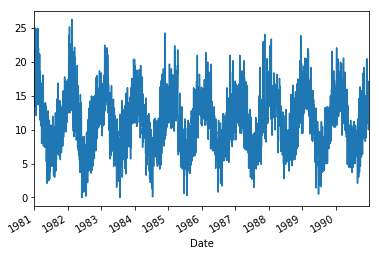

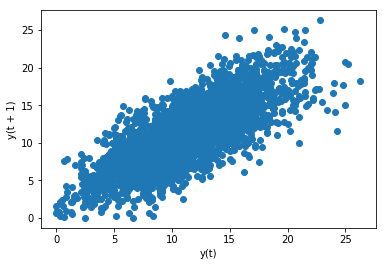

In [42]:
#====================EXPLORE====================
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import lag_plot

# Explore time series data
series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)
print(series.head(5))
series.plot()
pyplot.show()

# Explore Correlation
lag_plot(series)
pyplot.show()

In [40]:
#===============CORRELATION VALUE==================
from pandas import Series
from pandas import DataFrame
from pandas import concat

series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)

# Make time series data (key:value structure) to 2-dimensional labeled data structure 
values = DataFrame(series.values) 

# Create lag column (t-p)
p = 29
dataframe = concat([values.shift(p), values], axis=1)
dataframe.columns = ['t-'+str(p), 't+'+str(p)] 

# Calculate correlation matrix 
result = dataframe.corr() 
print(result)

          t-29      t+29
t-29  1.000000  0.489828
t+29  0.489828  1.000000


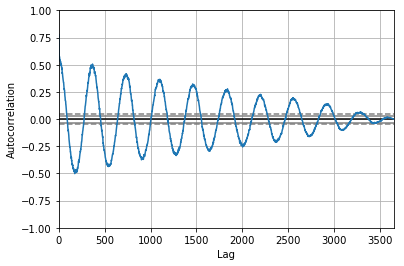

In [4]:
#===============AUTOCORRELATION PLOT==================
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)
autocorrelation_plot(series)
pyplot.show()

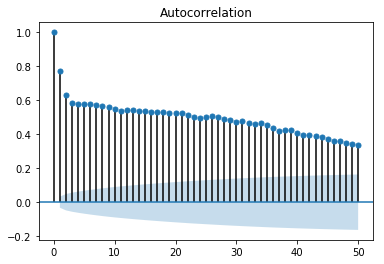

In [30]:
#===============ZOOM-IN TO PLOT==================
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)
plot_acf(series, lags=50) # vary lags for zoom-in or zoom-out
pyplot.show()

Lag: 29
Coefficients: [ 0.52844037  0.58562839 -0.084335    0.05080053  0.0370458   0.03758386
  0.02875499  0.04407153  0.01448987  0.03081129  0.00190145  0.00603753
  0.01841633  0.0220348   0.00227737  0.02251714  0.01222489  0.0109223
  0.0404493  -0.00404638  0.02318467  0.00760138  0.01165488 -0.02148487
  0.00659081  0.01409557  0.02329473  0.00683792  0.01097111 -0.00766575]
Test MSE: 5.262


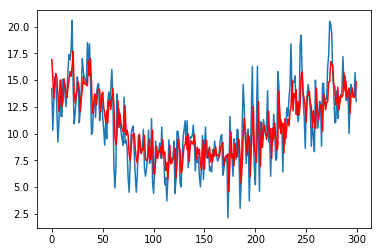

In [37]:
#================TRAIN MODEL TO FIT DATA (ROLLING MODEL)=====================
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)

# Split dataset
test_length = 300
X = series.values
train, test = X[1:len(X)-test_length], X[len(X)-test_length:]

# Train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar # best order 
coef = model_fit.params # [b0 b1 ... bn]
print('Lag:', window)
print('Coefficients:', coef)

# Walk forward over time steps in test
history = train[len(train)-window:] # row ที่ len(train)-window ถึง end 
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history) # 29
    lag = [history[i] for i in range(length-window,length)] # 1-29
    
    # create yhat
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# Plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()